## scipy-stats

![Scipy Logo](images/scipy_logo2.png)

## Overview of Scipy Stats

---

### A clear and concise overview of SciPy and SciPy.stats

### **Firstly what is SciPy**

SciPy is an open source scientific library for Python which gives us the ability to perform Mathematical, Scientific and Engineering Computations. (((((SciPy also provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems...)))

The SciPy library is built to work with NumPy arrays and provides use with many user-friendly and efficient numerical practices such as routines for numerical integration and optimization. NumPy and SciPy are easy to use, but powerful enough to be used by some of the world's leading scientists and engineers.!!! 

#### **What is SciPy.stats?**

All of the statistics functions of the SciPy library are located in the sub-package named scipy.stats. used for statistical analysis

#### **Uses of SciPy.stats**

From my research I found out that the stats module scipy.stats is a very important feature of SciPy. 

It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values. We can deal with random, continuous, and random variables. It also has functions for working with various types of distributions. It offers us the ability to perform a wide range of statistic analysis.

## Overview of ANOVA here .... might include description of T TESTS also ...WIP

## Demonstrations 

## selected dataset for testing 

BR NOTE
My ideas is to see does the grade a student receives vary based opn their gender?
Also maybe look at the diet dataset as another example might be btter dataset?

## imports

In [1]:
# Numerical arrays.
import numpy as np
# Plotting.
import seaborn as sns
# Stats.
import scipy.stats as ss
#pandas 
import pandas as pd

## Exploring the dataset - work lending

In [22]:
#import dataset
df = pd.read_csv('datasets/work/work_data2.csv')
#display daframe
df

,Demographic Category,Loan Category,Loan_Amount_Issued
0,TEEN,PERSONAL,8000.0
1,TEEN,PERSONAL,8000.0
2,TEEN,PERSONAL,8000.0
3,TEEN,PERSONAL,8000.0
4,TEEN,PERSONAL,8000.0
...,...,...,...
2677,OVER 50s,PERSONAL,0.0
2678,OVER 50s,PERSONAL,0.0
2679,OVER 50s,PERSONAL,0.0
2680,OVER 65s,PERSONAL,0.0


In [23]:
#display on screen first 5 rows
df.head()

,Demographic Category,Loan Category,Loan_Amount_Issued
0,TEEN,PERSONAL,8000.0
1,TEEN,PERSONAL,8000.0
2,TEEN,PERSONAL,8000.0
3,TEEN,PERSONAL,8000.0
4,TEEN,PERSONAL,8000.0


In [24]:
#show a tabular discription of the dataset
df.describe()

,Loan_Amount_Issued
count,2682.000000
mean,2288.860194
std,2135.014873
min,0.000000
25%,500.000000
50%,1500.000000
75%,3500.000000
max,8000.000000


## Assumptions

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [25]:
# Loam Amount Issued is The dependent variable.
#df["Loan_Amount_Issued"] = df.Loan_Amount_Issued.astype(float)
dependent = df['Loan_Amount_Issued']
x = dependent
x

0       8000.0
1       8000.0
2       8000.0
3       8000.0
4       8000.0
         ...  
2677       0.0
2678       0.0
2679       0.0
2680       0.0
2681       0.0
Name: Loan_Amount_Issued, Length: 2682, dtype: float64

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

In [26]:
# Independent variable.
independent = df['Demographic Category']
independent
#use grouby and get count of each gender in dataset
df.groupby(by = "Demographic Category").count()

,Loan Category,Loan_Amount_Issued
Demographic Category,,
ADULT SINGLE,269,269
OTHERS,39,39
OVER 50s,615,615
OVER 65s,395,395
SINGLE PARENT,454,454
TEEN,30,30
YOUNG COUPLE,76,76
YOUNG FAMILY,302,302
YOUNG SINGLE,502,502


**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - age demographic has to fit into one of the cateogries - you cant have two ages

***Assumption 4: Outliers***

There should be no significant outliers.

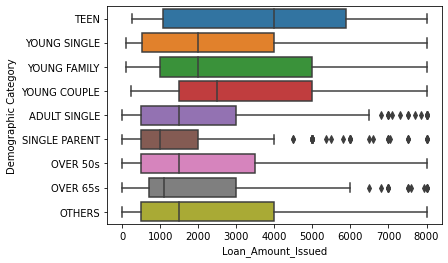

In [27]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

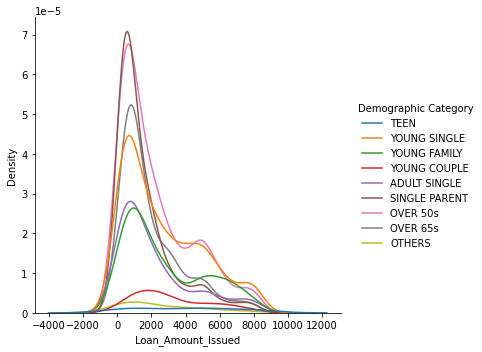

In [33]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [38]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'SINGLE PARENT'],
    dependent[independent == 'YOUNG FAMILY'],)

LeveneResult(statistic=24.589709255131904, pvalue=4.222735817044594e-11)

## One Way Anova

In [40]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'YOUNG COUPLE'],
    dependent[independent == 'SINGLE PARENT'],
    )

F_onewayResult(statistic=48.829586421243256, pvalue=8.451968216539731e-12)

### Exploring the dataset - exam grades

In [29]:
#import dataset
df = pd.read_csv('datasets/grades/exam_grades.csv')
#display daframe
df

,Unnamed: 0,sex,exam1,exam2,exam3,course_grade
0,1,Man,84.5000,69.5,86.5000,76.2564
1,2,Man,80.0000,74.0,67.0000,75.3882
2,3,Man,56.0000,70.0,71.5000,67.0564
3,4,Man,64.0000,61.0,67.5000,63.4538
4,5,Man,90.5000,72.5,75.0000,72.3949
...,...,...,...,...,...,...
228,229,Man,98.2143,89.1,71.1111,85.5208
229,230,Woman,95.0000,86.0,78.3333,83.6959
230,231,Man,97.1429,53.5,67.2222,72.1189
231,232,Man,85.0000,63.0,75.0000,67.1996


In [9]:
#display on screen first 5 rows
df.head()

,Unnamed: 0,sex,exam1,exam2,exam3,course_grade
0,1,Man,84.5,69.5,86.5,76.2564
1,2,Man,80.0,74.0,67.0,75.3882
2,3,Man,56.0,70.0,71.5,67.0564
3,4,Man,64.0,61.0,67.5,63.4538
4,5,Man,90.5,72.5,75.0,72.3949


In [10]:
#show a tabular discription of the dataset
df.describe()

,Unnamed: 0,exam1,exam2,exam3,course_grade
count,233.000000,232.000000,233.000000,233.000000,233.000000
mean,117.000000,80.766185,72.605579,75.479589,72.238831
std,67.405489,11.067860,13.777468,14.706791,9.807053
min,1.000000,46.500000,38.000000,28.000000,43.273300
25%,59.000000,73.500000,63.000000,67.000000,66.695800
50%,117.000000,82.000000,74.000000,78.000000,72.526700
75%,175.000000,89.625000,83.000000,86.000000,78.931000
max,233.000000,99.300000,99.500000,98.888900,97.566700


### **Assumptions**

When we choose to analyse our data using a one-way ANOVA, part of the process involves checking to make sure that the data we want to analyse can actually be analysed using a one-way ANOVA. We need to do this because it is only appropriate to use a one-way ANOVA if our data "passes" six assumptions that are required for a one-way ANOVA to give you a valid result. [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php]

***Assumption 1: Dependent variable***

Dependent variable should be measured at the interval or ratio level.

In [11]:
# Course grade is The dependent variable.
dependent = df['course_grade']
x = dependent
x

0      76.2564
1      75.3882
2      67.0564
3      63.4538
4      72.3949
        ...   
228    85.5208
229    83.6959
230    72.1189
231    67.1996
232    66.4035
Name: course_grade, Length: 233, dtype: float64

***Assumption 2: Independent variable***

Independent variable should consist of two or more categorical, independent groups.

Check - Independent variable will be gender - male or female

In [12]:
# Independent variable.
independent = df['sex']
independent
#use grouby and get count of each gender in dataset
df.groupby(by = "sex").count()

,Unnamed: 0,exam1,exam2,exam3,course_grade
sex,,,,,
Man,188,187,188,188,188
Woman,45,45,45,45,45


**Assumption 3:**

You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves

Check - gender has to be either male or female

***Assumption 4: Outliers***

There should be no significant outliers.

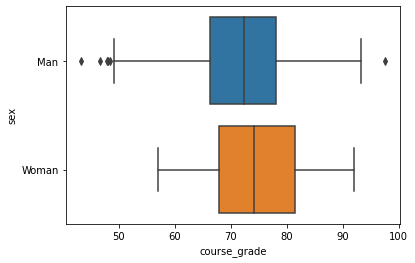

In [13]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

Check - We can note from above there is some outliers for male but should not be significant enough to affect our anova, this can be seen with the outliers shows as diamond symbols -  further testing to see ...

***Assumption 5: Normality***

Dependent variable should be approximately normally distributed for each category of the independent variable.

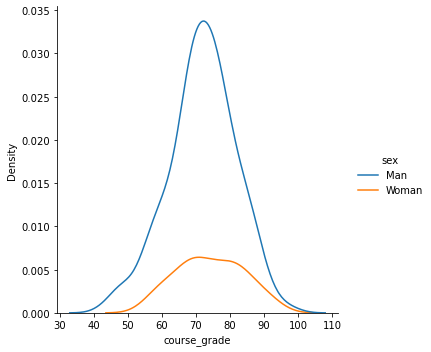

In [14]:
# KDEs of the three categories.

# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

We can see from plot above both the dependent variable "grade" for each gender can be classed as normally distributed

***Assumption 6: Homogeneity of Variances***

There needs to be homogeneity of variances

In [15]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'Man'],
    dependent[independent == 'Woman'],
    )

LeveneResult(statistic=0.14701128333301705, pvalue=0.7017606346845222)

BR NOTE NEED TO BEEF UP AND ADD MORE EXPLANATIONS ETC

### One-way ANOVA

In [16]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'Man'],
    dependent[independent == 'Woman'],
    )

F_onewayResult(statistic=2.2108345266843408, pvalue=0.1384081569387468)

BR NOTE - NEED TO PROVIDE MORE INFO AND WHAT THE RESULT MEANS ETC 

WELCH ANOVOA ETC -----


### Post Hoct Tests

### Conclusion and Findings

### References and Research to go here - (BR note -  more research currently in the word document )

** BR NOTE - remember to link back to code and snippets above .

Offical SciPy website - https://scipy.org/

Tutroialspoint SciPy quick guide: https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm

Offical SciPy stats refernce website: https://docs.scipy.org/doc/scipy/reference/stats.html

Basic Syntax Markdown - https://www.markdownguide.org/basic-syntax/

Four Ways to Conduct One-Way ANOVA with Python - Erik Marsja - [https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/]

Exploratory Data Analysis in Python - GeeksforGeeks - [https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/]

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/

ANOVA Test: Definition, Types, Examples, SPSS - Statistics How To [https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/]

Pandas Group By: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html


# END